<a href="https://colab.research.google.com/github/Priyo-prog/Machine-Learning/blob/main/Fashion%20MNIST/fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion Problem Statement**

Categorize the images in different classes of attires.

## **Import the Dataset**

In [1]:
# Mount the google colab drive
from google.colab import drive
drive.mount('/content/drive')
import random

Mounted at /content/drive


In [2]:
file_path_train = '/content/drive/MyDrive/Data Science/Machine Learning/Fashion MNIST/fashion-mnist_train.csv'
file_path_test = '/content/drive/MyDrive/Data Science/Machine Learning/Fashion MNIST/fashion-mnist_test.csv'

In [3]:
%cd /content/drive/MyDrive/Data Science/Machine Learning/Fashion MNIST

/content/drive/MyDrive/Data Science/Machine Learning/Fashion MNIST


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
fashion_train_df = pd.read_csv(file_path_train, sep=',')

In [6]:
fashion_test_df = pd.read_csv(file_path_test, sep=',')

## **Visualization of Dataset**

In [7]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_train_df.shape, fashion_test_df.shape

((60000, 785), (10000, 785))

In [9]:
# Convert training and testing set with array
training = np.array(fashion_train_df, dtype="float32")

In [10]:
testing = np.array(fashion_test_df, dtype="float32")

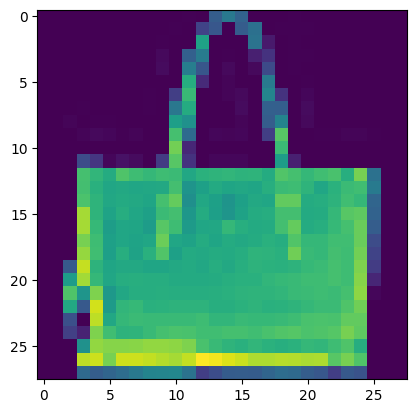

In [11]:
# show random images
i = random.randint(1,60000)
# show the image in plt.imshow (row number 12 and all columns)
plt.imshow(training[i, 1:].reshape(28,28))

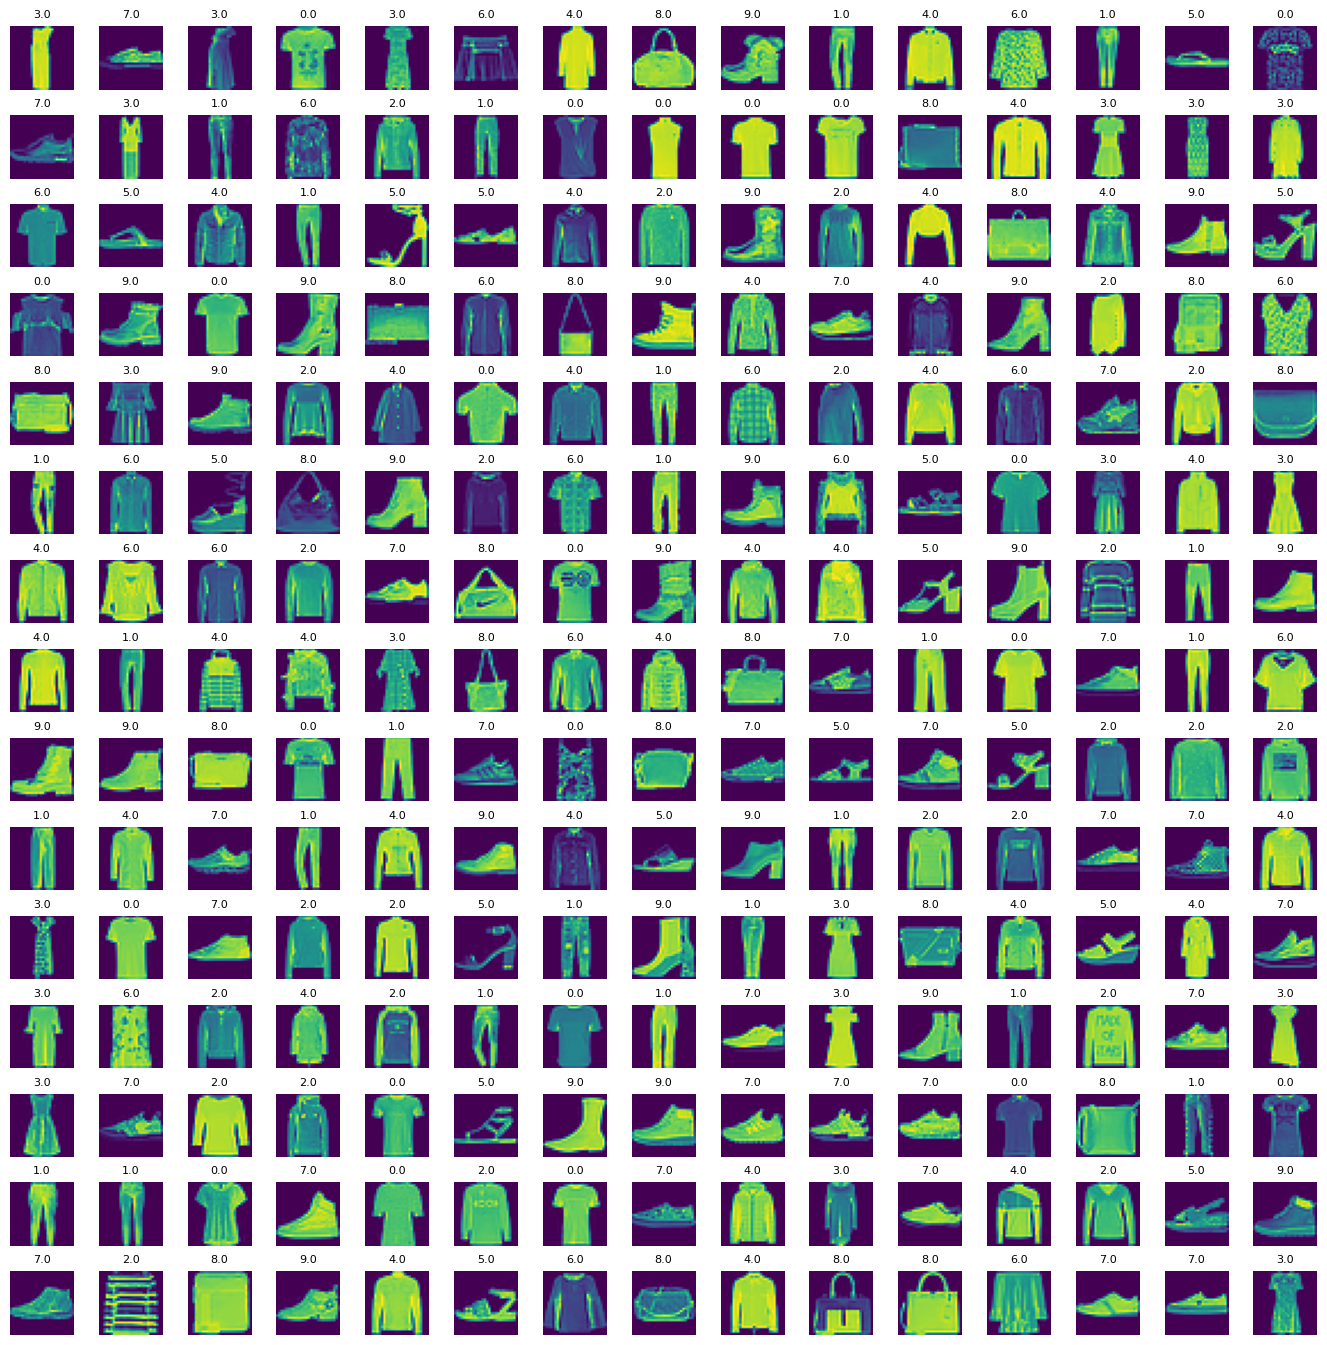

In [12]:
# Let's view some more images in a grid format
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))

axes = axes.ravel() # flatten the 15 x 15 matrix in 225 array

# Get the length of the training set
n_training = len(training)

for i in np.arange(0, W_grid * L_grid):

  index = np.random.randint(0, n_training)

  axes[i].imshow(training[index, 1:].reshape(28,28))
  axes[i].set_title(training[index,0], fontsize=8)
  axes[i].axis("off")

plt.subplots_adjust(hspace=0.4)

## Train the Model

In [13]:
# Select all the columns except the 1st column and normalize the data
X_train = training[:, 1:]/255 
y_train = training[:, 0]

In [14]:
# Testing data
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [15]:
# Create the Validation Dataset to understand
# whether the data is generalized or not
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [16]:
# Reshape the data
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [17]:
X_train.shape, X_test.shape, X_validate.shape

((48000, 28, 28, 1), (10000, 28, 28, 1), (12000, 28, 28, 1))

In [18]:
import keras

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [22]:
cnn_model = Sequential()

In [24]:
cnn_model.add(Conv2D(32,3,3, input_shape=(28,28,1), activation="relu"))

In [25]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [26]:
# Now Flatten the layers before sending to the Dense layers
cnn_model.add(Flatten())

In [28]:
cnn_model.add(Dense(32, activation="relu"))

In [29]:
cnn_model.add(Dense(32, activation="sigmoid"))

In [30]:
# Compile the model before fitting the model
cnn_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(lr=0.001),
                  metrics=["accuracy"])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [32]:
cnn_model.fit(X_train, y_train,
              batch_size=512,
              epochs=50,
              verbose=1,
              validation_data=(X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 6s 41ms/step - loss: 1.7551 - accuracy: 0.5139 - val_loss: 0.9138 - val_accuracy: 0.6712
Epoch 2/50
94/94 [==============================] - 3s 30ms/step - loss: 0.8130 - accuracy: 0.7070 - val_loss: 0.7491 - val_accuracy: 0.7239
Epoch 3/50
94/94 [==============================] - 3s 29ms/step - loss: 0.7075 - accuracy: 0.7423 - val_loss: 0.6797 - val_accuracy: 0.7525
Epoch 4/50
94/94 [==============================] - 3s 34ms/step - loss: 0.6557 - accuracy: 0.7590 - val_loss: 0.6453 - val_accuracy: 0.7607
Epoch 5/50
94/94 [==============================] - 4s 45ms/step - loss: 0.6208 - accuracy: 0.7721 - val_loss: 0.6081 - val_accuracy: 0.7698
Epoch 6/50
94/94 [==============================] - 3s 28ms/step - loss: 0.5978 - accuracy: 0.7797 - val_loss: 0.5865 - val_accuracy: 0.7857
Epoch 7/50
94/94 [==============================] - 3s 29ms/step - loss: 0.5762 - accuracy: 0.7884 - val_loss: 0.5664 - val_accuracy: 0.7927
Epoch 8/50
94

## **Evaluate the Model**

In [34]:
evaluate = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {round(evaluate[1], 3)}")

313/313 [==============================] - 1s 3ms/step - loss: 0.3885 - accuracy: 0.8563
Test Accuracy: 0.856


In [36]:
predicted_classes = cnn_model.predict(X_test)
predicted_classes

313/313 [==============================] - 1s 4ms/step


array([[9.9999821e-01, 8.3694446e-01, 9.9920762e-01, ..., 1.3029532e-07,
        2.1493900e-06, 3.7512931e-05],
       [9.9552524e-01, 1.0000000e+00, 9.8787367e-01, ..., 1.4746271e-04,
        8.2345628e-05, 2.4337385e-02],
       [9.9688351e-01, 1.7292164e-01, 9.9985927e-01, ..., 6.4528489e-05,
        3.0676997e-03, 3.0469085e-04],
       ...,
       [7.3513025e-01, 2.9269618e-03, 9.3233937e-01, ..., 1.1740477e-04,
        4.6437145e-03, 6.7757164e-06],
       [9.9963695e-01, 3.9947039e-01, 9.9944139e-01, ..., 2.5221647e-07,
        1.4288624e-05, 2.1147223e-05],
       [9.9802691e-01, 9.9995577e-01, 9.9980462e-01, ..., 8.9260484e-06,
        5.6937821e-05, 4.4450007e-04]], dtype=float32)